In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# データの読み込み
data = pd.read_csv("../master.csv")

In [4]:
# データの先頭を確認
data.head()

,レース名,地面,距離,着順,枠,馬順,馬名,年齢,斤量,騎手,タイム,着差,人気,単勝オッズ,後3F,コーナー通過順,厩舎,馬体重,体重増減
0,初日の出S,ダ,1200m,1,8,15,サマーウインド,牡5,57.0,内田博,1:10.1,NaN,1.0,1.6,36.5,2-2,庄野,518.0,2.0
1,初日の出S,ダ,1200m,2,3,5,ファイナルスコアー,牡5,57.0,後藤,1:10.9,5,2.0,5.0,36.5,10-8,杉浦,494.0,0.0
2,初日の出S,ダ,1200m,3,1,2,ダイワプリベール,牡4,56.0,武士沢,1:11.2,1.3/4,13.0,145.5,36.7,12-10,池上,470.0,8.0
3,初日の出S,ダ,1200m,4,7,13,ストレートイン,牡4,56.0,中舘,1:11.3,1/2,5.0,17.8,37.9,1-1,柴崎,514.0,10.0
4,初日の出S,ダ,1200m,5,6,11,サラトガ,牝6,55.0,木幡,1:11.4,1/2,7.0,30.4,37.5,4-4,本郷,502.0,-4.0


In [5]:
# データのサイズを確認
print(data.shape)

(542908, 19)


In [6]:
# データの基本情報を確認
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542908 entries, 0 to 542907
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   レース名     542895 non-null  object 
 1   地面       542908 non-null  object 
 2   距離       542908 non-null  object 
 3   着順       542908 non-null  object 
 4   枠        542908 non-null  int64  
 5   馬順       542908 non-null  int64  
 6   馬名       542908 non-null  object 
 7   年齢       542908 non-null  object 
 8   斤量       542908 non-null  float64
 9   騎手       542908 non-null  object 
 10  タイム      538337 non-null  object 
 11  着差       500313 non-null  object 
 12  人気       540988 non-null  float64
 13  単勝オッズ    540988 non-null  float64
 14  後3F      538327 non-null  float64
 15  コーナー通過順  540130 non-null  object 
 16  厩舎       542908 non-null  object 
 17  馬体重      541863 non-null  float64
 18  体重増減     541685 non-null  float64
dtypes: float64(6), int64(2), object(11)
memory usage: 78.7+ MB
None


In [7]:
# 欠損値の確認
data.isnull().sum()

レース名          13
地面             0
距離             0
着順             0
枠              0
馬順             0
馬名             0
年齢             0
斤量             0
騎手             0
タイム         4571
着差         42595
人気          1920
単勝オッズ       1920
後3F         4581
コーナー通過順     2778
厩舎             0
馬体重         1045
体重増減        1223
dtype: int64

In [7]:
# 数値型変数の基礎統計量を表示
data.describe()

,枠,馬順,斤量,人気,単勝オッズ,後3F,馬体重,体重増減
count,542908.000000,542908.000000,542908.000000,540988.000000,540988.000000,538327.000000,541863.000000,541685.000000
mean,4.747768,7.885275,55.029501,7.861051,66.534407,36.363366,470.467692,0.324070
std,2.272126,4.462725,1.773052,4.449931,96.064704,4.624651,29.986934,6.455805
min,1.000000,1.000000,47.000000,1.000000,1.100000,12.800000,330.000000,-54.000000
25%,3.000000,4.000000,54.000000,4.000000,8.500000,35.300000,450.000000,-4.000000
50%,5.000000,8.000000,55.000000,8.000000,25.000000,36.800000,470.000000,0.000000
75%,7.000000,11.000000,56.000000,11.000000,81.725000,38.400000,490.000000,4.000000
max,8.000000,18.000000,65.000000,18.000000,999.900000,148.700000,999.000000,54.000000


In [8]:
num_data = pd.DataFrame(data, columns=["枠", "馬順", "斤量", "人気", "単勝オッズ", "後3F", "馬体重", "体重増減"])

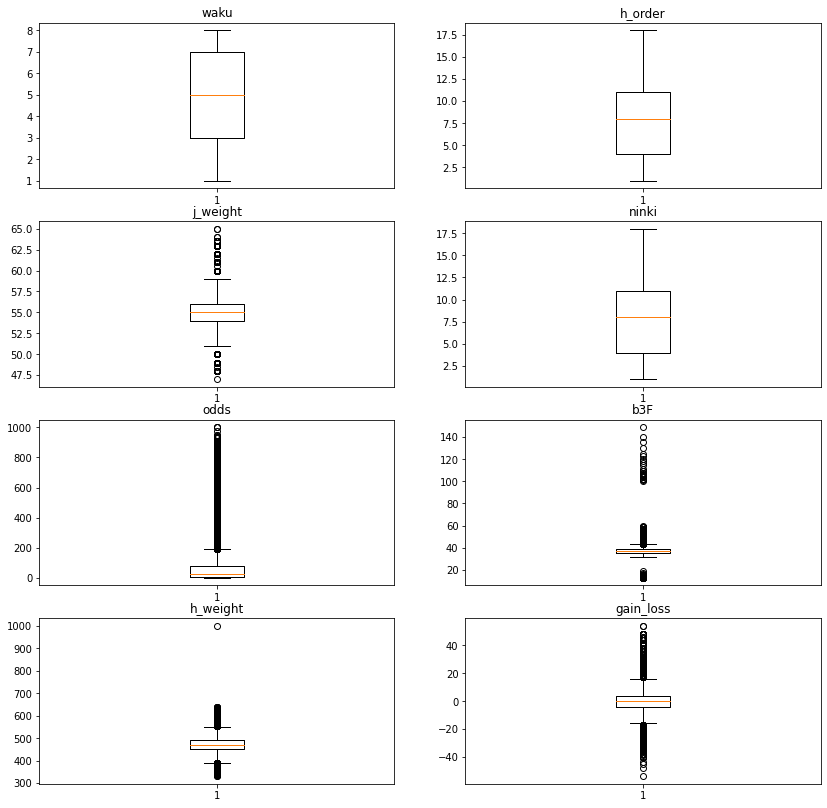

In [9]:
# 数値型のデータの箱ひげ図を作成
columns = ["waku", "h_order", "j_weight", "ninki", "odds", "b3F", "h_weight", "gain_loss"]
plt.figure(figsize=(14,14))
for i in range(num_data.shape[1]):
    plt.subplot(4,2,i+1)
    plt.boxplot(num_data.dropna().iloc[:,i])
    plt.title(columns[i])

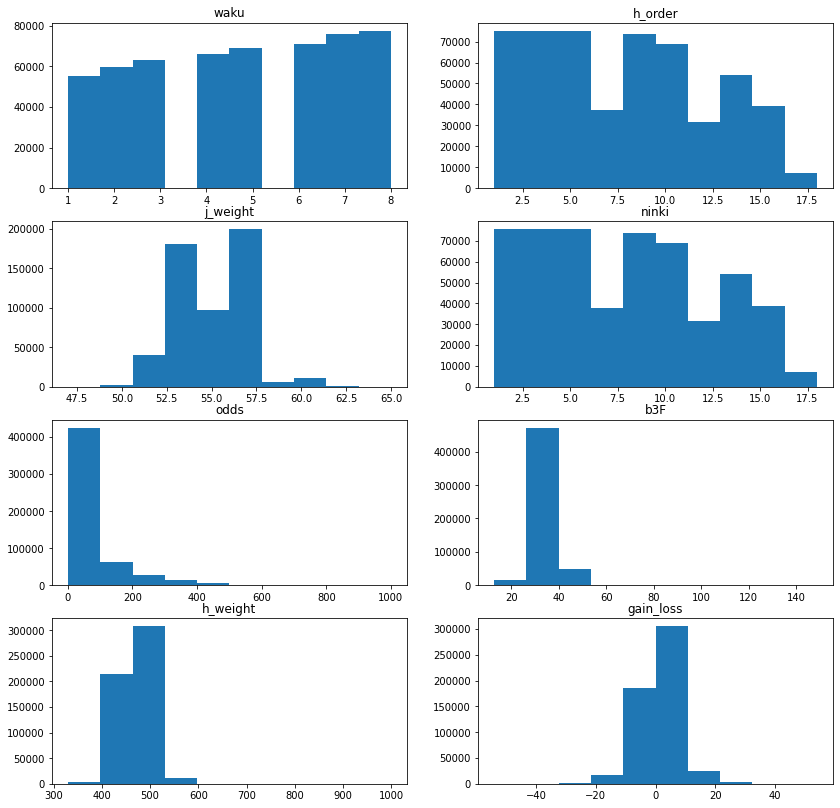

In [10]:
# 数値型のデータのヒストグラムを作成
plt.figure(figsize=(14,14))
for i in range(num_data.shape[1]):
    plt.subplot(4,2,i+1)
    plt.hist(num_data.dropna().iloc[:,i])
    plt.title(columns[i])

In [11]:
# オブジェクト型変数の基礎統計量を表示
data.describe(include="O").T

,count,unique,top,freq
レース名,542895,1526,3歳未勝利,139762
地面,542908,3,ダ,265623
距離,542908,53,1800m,119795
着順,542908,22,1,38007
馬名,542908,57838,スズカルパン,100
年齢,542908,32,牡3,122215
騎手,542908,859,幸,10333
タイム,538337,2185,1:09.9,1921
着差,500313,50,クビ,96082
コーナー通過順,540130,12431,2-2,20579


In [9]:
# 予測に使うデータ以外を落とす
use_data = pd.DataFrame(data, columns=["地面", "距離", "着順", "馬名", "年齢", "斤量", "騎手", "厩舎", "馬体重", "体重増減"])

In [13]:
# データのサイズを確認
print(use_data.shape)

(542908, 10)


In [14]:
# データの基本情報を確認
print(use_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542908 entries, 0 to 542907
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   地面      542908 non-null  object 
 1   距離      542908 non-null  object 
 2   着順      542908 non-null  object 
 3   馬名      542908 non-null  object 
 4   年齢      542908 non-null  object 
 5   斤量      542908 non-null  float64
 6   騎手      542908 non-null  object 
 7   厩舎      542908 non-null  object 
 8   馬体重     541863 non-null  float64
 9   体重増減    541685 non-null  float64
dtypes: float64(3), object(7)
memory usage: 41.4+ MB
None


In [15]:
# 欠損値の確認
use_data.isnull().sum()

地面         0
距離         0
着順         0
馬名         0
年齢         0
斤量         0
騎手         0
厩舎         0
馬体重     1045
体重増減    1223
dtype: int64

In [19]:
# 基礎統計量の表示
use_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
地面,542908,3,ダ,265623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
距離,542908,53,1800m,119795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
着順,542908,22,1,38007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
馬名,542908,57838,スズカルパン,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
年齢,542908,32,牡3,122215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
斤量,542908.0,NaN,NaN,NaN,55.029501,1.773052,47.0,54.0,55.0,56.0,65.0
騎手,542908,859,幸,10333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
厩舎,542908,801,矢作,5422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
馬体重,541863.0,NaN,NaN,NaN,470.467692,29.986934,330.0,450.0,470.0,490.0,999.0
体重増減,541685.0,NaN,NaN,NaN,0.324070,6.455805,-54.0,-4.0,0.0,4.0,54.0


In [21]:
# 相関係数の算出
use_data.corr()

,斤量,馬体重,体重増減
斤量,1.000000,0.346638,0.007837
馬体重,0.346638,1.000000,0.119786
体重増減,0.007837,0.119786,1.000000


In [ ]:
#todo:馬体重の外れ値発生理由の調査、除外
#todo:着順の外れ値を調査

In [ ]:
hn = data["馬名"]
hn.value_counts()

In [34]:
pd.pivot_table(data, index="馬名", columns="着順", aggfunc="mean")

人気                                                             \
着順           1    10         11    12    13    14    15    16    17    18   
馬名                                                                          
アイアイエンデバー  3.5   6.4   8.000000  13.0  14.0   6.0  16.0  13.0   NaN   NaN   
アイアイサッチャー  NaN   NaN        NaN  11.0  13.5   NaN   NaN   NaN   NaN   NaN   
アイアイテーラー   2.0   NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
アイアイドリーミー  NaN   NaN        NaN   NaN   NaN   NaN  12.0  16.0  15.0   NaN   
アイアイハッピー   NaN   NaN  13.666667  14.0   NaN  11.0  14.0   NaN   NaN   NaN   
...        ...   ...        ...   ...   ...   ...   ...   ...   ...   ...   
ヴンダー       NaN   NaN  12.000000   NaN   NaN  15.0   NaN   NaN   NaN   NaN   
ヴンダーゾンネ    7.5   6.0   7.000000   3.0  14.0   2.0   7.0   NaN   NaN  13.0   
ヴーディーズピアス  2.0  16.0  14.000000   NaN   NaN  10.5   NaN   NaN   NaN   NaN   
ヴードゥー      NaN   NaN        NaN  16.0  14.0   NaN  16.0   NaN   NaN  15.0   
ヴードゥーフェスト  2.0   6.5  10.000000   NaN   NaN   NaN   NaN  11.5   NaN   NaN   

           ...    馬順                                                  
着順         ...     4     5     6    7     8     9    中止   取消  失格  除外  
馬名         ...                                                        
アイアイエンデバー  ...   6.5  14.0  14.0  7.0  7.00   5.5   NaN  3.0 NaN NaN  
アイアイサッチャー  ...   NaN   NaN   NaN  NaN   NaN   NaN   NaN  NaN NaN NaN  
アイアイテーラー   ...   NaN   NaN   NaN  NaN   NaN   NaN  14.0  NaN NaN NaN  
アイアイドリーミー  ...   NaN   NaN   NaN  NaN  7.00   NaN   NaN  NaN NaN NaN  
アイアイハッピー   ...   NaN   NaN   NaN  3.0  2.00   8.5   NaN  NaN NaN NaN  
...        ...   ...   ...   ...  ...   ...   ...   ...  ...  ..  ..  
ヴンダー       ...   NaN   NaN   NaN  NaN   NaN   NaN   NaN  NaN NaN NaN  
ヴンダーゾンネ    ...  12.0   4.0   NaN  4.0  9.00  13.0   NaN  NaN NaN NaN  
ヴーディーズピアス  ...  13.0   8.5   2.0  8.0  7.25  10.0   NaN  NaN NaN NaN  
ヴードゥー      ...   NaN   NaN   NaN  NaN   NaN   NaN   NaN  NaN NaN NaN  
ヴードゥーフェスト  ...   NaN   NaN   9.0  7.0  9.00   NaN   NaN  NaN NaN NaN  

[57838 rows x 167 columns]

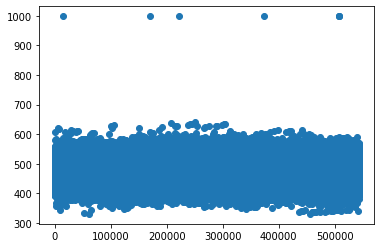

In [22]:
hw = data["馬体重"]

x = [x for x in range(0, len(hw))]
plt.scatter(x, hw)


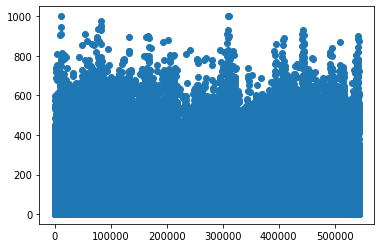

In [24]:
odds = data["単勝オッズ"]

x = [x for x in range(0, len(hw))]
plt.scatter(x, odds)

In [28]:
rank = data["着順"]

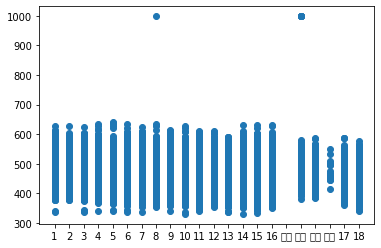

In [29]:
# 着順と馬体重
plt.scatter(rank, hw)

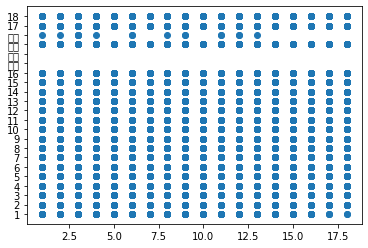

In [30]:
f = data["人気"]
plt.scatter(f, rank)

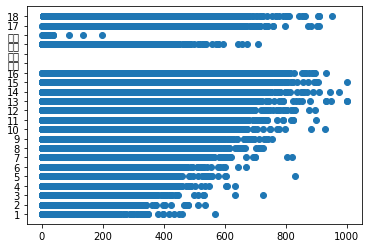

In [31]:
plt.scatter(odds, rank)